In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
data = np.random.binomial(100,0.5,1)
a = np.mean(data)/100
u = 10*(a-0.5)/np.sqrt(a*(1-a))
p = 1-norm.cdf(u)
print("the p_value is {}".format(p))#p larger than 0.05,will not reject H0
if p>0.05:
    print("Will not reject the H0.")
else:
    print("Will reject the H0.")

the p_value is 0.4207246442216692
Will not reject the H0.


for n=20, the time we reject the H0 is 52
for n=100, the time we reject the H0 is 40
for n=1000, the time we reject the H0 is 51


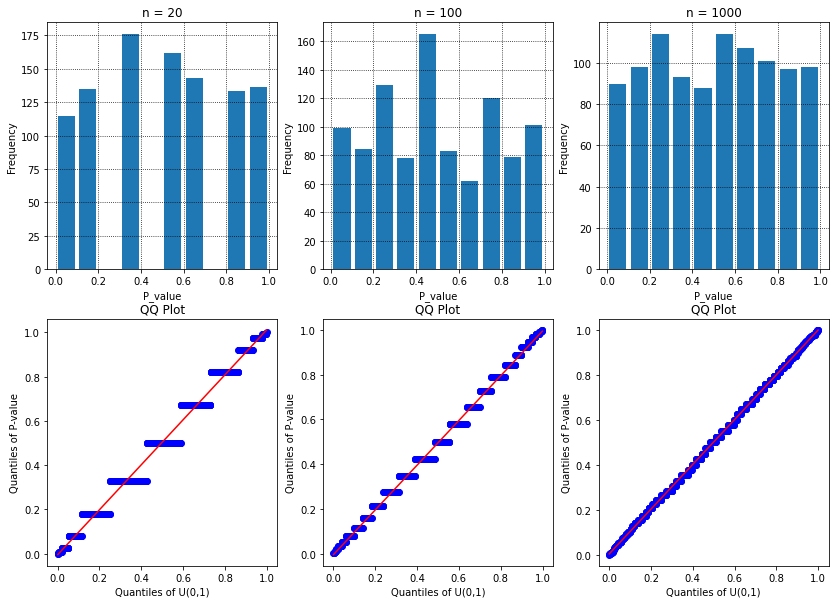

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
n_list=[20,100,1000]
plt.figure(figsize=(14, 10)) 

for i in range(3): 
    n = n_list[i]
    count=0
    list=[]
    for t in range(1000):    
        data = np.random.binomial(n,0.5,1)
        a = np.mean(data)/n
        u = np.sqrt(n)*(a-0.5)/np.sqrt(a*(1-a))
        p = 1-norm.cdf(u)
        list.append(p)
        if p<0.05:
            count+=1
    print("for n={}, the time we reject the H0 is {}".format(n,count))
    
    plt.subplot(2,3,i+1)
    plt.title('n = {}'.format(n))
    plt.ylabel('Frequency')
    plt.xlabel('P_value')
    plt.grid(color="k", linestyle=":")
    plt.hist(list,density=False,rwidth=0.8)
    plt.subplot(2,3,i+4)
    stats.probplot(list,dist=stats.uniform, plot=plt)
    plt.title('QQ Plot')
    plt.ylabel('Quantiles of P-value')
    plt.xlabel('Quantiles of U(0,1)')
plt.show()

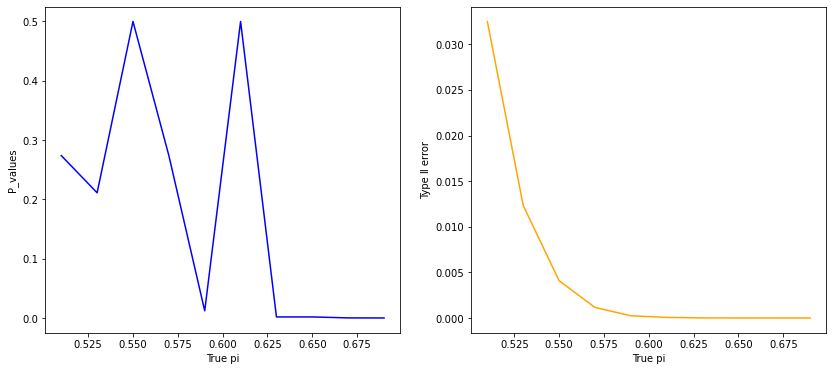

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
list_p = []
list_pi =[]
list_error2=[]
for pi in np.arange(0.51,0.7,0.02):
    list_pi.append(pi)
    data = np.random.binomial(100,pi,1)
    z_alpha = norm.ppf(0.05)
    a = np.mean(data)/100
    u = 10*(a-0.5)/np.sqrt(a*(1-a))
    p = 1-norm.cdf(u)
    list_p.append(p)
    o = 10*(pi-0.5)/np.sqrt(a*(1-a))
    error2=norm.cdf(z_alpha-o)
    list_error2.append(error2)
plt.figure(figsize=(14, 6)) 
plt.subplot(121)
plt.xlabel('True pi')
plt.ylabel('P_values')
plt.plot(list_pi,list_p,color='blue')
plt.subplot(122)
plt.xlabel('True pi')
plt.ylabel('Type Ⅱ error')
plt.plot(list_pi,list_error2,color='orange')
plt.show()